In [65]:
#hw: https://github.com/maplezzz/NTU_ML2017_Hung-yi-Lee_HW
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x = [122,234,231,124,245,45]
y = [23,45,65,34,23,24]
# y = w*x + b (参数未知)

In [64]:
bias = np.arange(-200,-100,1)
weight = np.arange(-5,5,0.1)
z = np.zeros((len(bias),len(weight))) #print(z)  np.shape(z)   z[0]
Bias,Weight = np.meshgrid(bias,weight) #把w,b值转换成网格数据,并重新赋值？？？
# print("bias",bias)  print("weight",weight)
for i in range(len(bias)):
    for j in range(len(weight)):#遍历所有生成的b，w可能组合。
        b = bias[i]
        w=weight[j]
        z[j][i] = 0 #所有的b,w 组合都放在z里面了
        for n in range(len(x)):
            z[j][i] += (y[n] - b - w*x[n])**2 #每一种b,w组合 加上 每一个（预测y和实际y）误差平方 
        z[j][i] = z[j][i]/len(x) #每一种b,w组合的平均误差：误差平方和/误差数量
    
print(z) 

[[326984.335      328090.435      329198.535      ... 443588.035
  444888.135      446190.235     ]
 [309737.5        310813.5        311891.5        ... 423421.5
  424691.5        425963.5       ]
 [292960.335      294006.235      295054.135      ... 403724.635
  404964.535      406206.435     ]
 ...
 [840824.85999999 839011.25999999 837199.65999999 ... 674217.65999999
  672598.05999999 670980.45999999]
 [869136.01499999 867292.31499999 865450.61499999 ... 699609.11499999
  697959.41499999 696311.71499999]
 [897916.83999999 896043.03999999 894171.23999999 ... 725470.23999999
  723790.43999999 722112.63999999]]


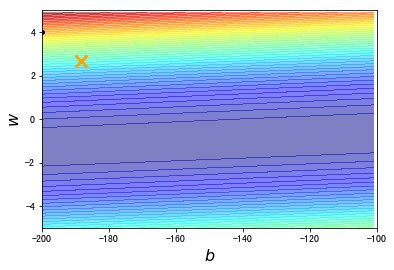

In [66]:
#随便设个初始值
w = 4
b = -200
lr_b = 0
lr_w = 0
lr= 0.00001 #learning rate
iteration = 100000

#store them for ploting
b_history = [b]
w_history = [w]

#iterations
for i in range(iteration):
    w_grad = 0
    b_grad = 0   
    for n in range(len(x)):
        w_grad = w_grad - 2*(y[n]-b-w*x[n])*x[n] #why？
        b_grad = b_grad - 2*(y[n]-b-w*x[n])*1  #2? 1?
        
    # Update parameters
    #一般的gd
#     w = w - lr*w_grad
#     b = b - lr*b_grad
    #改良版-adagrad
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    b = b - lr / np.sqrt(lr_b) * b_grad
    w = w - lr / np.sqrt(lr_w) * w_grad


    
    #store for plot
    b_history.append(b)
    w_history.append(w)

    # print(b_history)
    # print(w_history)


#plot
plt.contourf(bias, weight, z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

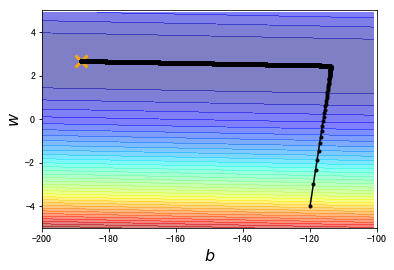

In [53]:
#regression demo 代码
# from https://github.com/zhkmxx9302013/MLAlgorithms/blob/master/course_gd.py
import numpy as np
import matplotlib.pyplot as plt


def gradient_decent(_x_data, _y_data, _b, _w, _iteration, _lr):
    """
    Gradient Decent
    :param _x_data:
    :param _y_data:
    :param _b:
    :param _w:
    :param _iteration:
    :param _lr:
    :return:
    """
    _b_history = [_b]
    _w_history = [_w]

    for _i in range(_iteration):
        b_grad = 0.0
        w_grad = 0.0

        for _n in range(len(x_data)):
            b_grad = b_grad - 2.0 * (y_data[_n] - _b - _w * _x_data[_n]) * 1.0
            w_grad = w_grad - 2.0 * (y_data[_n] - _b - _w * _x_data[_n]) * _x_data[_n]

        _b = _b - _lr * b_grad
        _w = _w - _lr * w_grad

        _b_history.append(_b)
        _w_history.append(_w)
    return _b_history, _w_history


def adagrad(_x_data, _y_data, _b, _w, _iteration, _lr):
    """
    Adagrad: auto adapt the learning rate.
    :param _x_data:
    :param _y_data:
    :param _b:
    :param _w:
    :param _iteration:
    :param _lr:
    :return:
    """
    _b_history = [_b]
    _w_history = [_w]
    lr_b = 0
    lr_w = 0

    for _i in range(_iteration):
        b_grad = 0.0
        w_grad = 0.0

        for _n in range(len(x_data)):
            b_grad = b_grad - 2.0 * (y_data[_n] - _b - _w * _x_data[_n]) * 1.0
            w_grad = w_grad - 2.0 * (y_data[_n] - _b - _w * _x_data[_n]) * _x_data[_n]

        lr_b = lr_b + b_grad ** 2
        lr_w = lr_w + w_grad ** 2
        _b = _b - _lr / np.sqrt(lr_b) * b_grad
        _w = _w - _lr / np.sqrt(lr_w) * w_grad

        _b_history.append(_b)
        _w_history.append(_w)
    return _b_history, _w_history


def plot_result(_b_history, _w_history):
    """
    Plot Result
    :param _b_history:
    :param _w_history:
    :return:
    """
    plt.contourf(x, y, z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
    plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
    plt.plot(_b_history, _w_history, 'o-', ms=3, lw=1.5, color='black')
    plt.xlim(-200, -100)
    plt.ylim(-5, 5)
    plt.xlabel(r'$b$', fontsize=16)
    plt.ylabel(r'$w$', fontsize=16)
    plt.show()


if __name__ == '__main__':
    x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
    y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]

    x = np.arange(-200, -100, 1)  # bias
    y = np.arange(-5, 5, 0.1)  # weight
    z = np.zeros((len(x), len(y)))
    X, Y = np.meshgrid(x, y)

    for i in range(len(x)):
        for j in range(len(y)):
            b = x[i]
            w = y[j]
            z[j][i] = 0

            for n in range(len(x_data)):
                z[j][i] = z[j][i] + (y_data[n] - b - w * x_data[n]) ** 2

            z[j][i] = z[j][i] / len(x_data)

    b = -120
    w = -4
    lr = 1
    iteration = 100000

    # b_history, w_history = gradient_decent(x_data, y_data, b, w, iteration, lr)
    b_history, w_history = adagrad(x_data, y_data, b, w, iteration, lr)

    plot_result(b_history, w_history)